# Importando bibliotecas que serão utilizadas no projeto

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Importando a tabela com os dados filtrados no arquivo 'Data/primeira_selecao_dados.ipynb'

Arquivo 'data_cancer_2005_2019.csv' na pasta 'Data' desse projeto.

In [3]:
dados1 = pd.read_csv('Data/data_cancer_2005_2019.csv', sep = ',', encoding = 'utf-8', low_memory = False)

In [27]:
dados1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 957959 entries, 0 to 957958
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         957959 non-null  int64  
 1   codigo_paciente    957959 non-null  int64  
 2   local_atendimento  957959 non-null  object 
 3   sexo               957959 non-null  object 
 4   idade              906892 non-null  float64
 5   cor                957959 non-null  object 
 6   nacionalidade      570600 non-null  object 
 7   estado_nascimento  572603 non-null  object 
 8   estado             957923 non-null  object 
 9   data               957958 non-null  object 
 10  data_obito         328005 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 80.4+ MB


In [28]:
dados1.head()

,Unnamed: 0,codigo_paciente,local_atendimento,sexo,idade,cor,nacionalidade,estado_nascimento,estado,data,data_obito
0,0,672054,RCBP CAMPINAS-UNICAMP,MASCULINO,30.0,BRANCO,BRASIL,SÃO PAULO,SÃO PAULO,07/10/2005,07/10/2005
1,1,673745,RCBP CAMPINAS-UNICAMP,MASCULINO,71.0,BRANCO,BRASIL,SÃO PAULO,SÃO PAULO,21/10/2005,21/10/2005
2,2,676350,RCBP CAMPINAS-UNICAMP,MASCULINO,71.0,BRANCO,BRASIL,SÃO PAULO,SÃO PAULO,06/11/2005,06/11/2005
3,3,679877,RCBP CAMPINAS-UNICAMP,FEMININO,57.0,PARDA,BRASIL,ALAGOAS,SÃO PAULO,15/05/2005,15/05/2005
4,4,676553,RCBP CAMPINAS-UNICAMP,MASCULINO,52.0,BRANCO,BRASIL,SÃO PAULO,SÃO PAULO,24/02/2005,24/02/2005


In [4]:
dados1.columns

Index(['Unnamed: 0', 'codigo_paciente', 'local_atendimento', 'sexo', 'idade',
       'cor', 'nacionalidade', 'estado_nascimento', 'estado', 'data',
       'data_obito'],
      dtype='object')

## Retirando a coluna 'Unnamed: 0'

In [4]:
dados2 = dados1[[
    'codigo_paciente', 'local_atendimento', 'sexo', 'idade',
    'cor', 'nacionalidade', 'estado_nascimento', 'estado', 'data',
    'data_obito'
]]

In [5]:
dados2.head()

,codigo_paciente,local_atendimento,sexo,idade,cor,nacionalidade,estado_nascimento,estado,data,data_obito
0,672054,RCBP CAMPINAS-UNICAMP,MASCULINO,30.0,BRANCO,BRASIL,SÃO PAULO,SÃO PAULO,07/10/2005,07/10/2005
1,673745,RCBP CAMPINAS-UNICAMP,MASCULINO,71.0,BRANCO,BRASIL,SÃO PAULO,SÃO PAULO,21/10/2005,21/10/2005
2,676350,RCBP CAMPINAS-UNICAMP,MASCULINO,71.0,BRANCO,BRASIL,SÃO PAULO,SÃO PAULO,06/11/2005,06/11/2005
3,679877,RCBP CAMPINAS-UNICAMP,FEMININO,57.0,PARDA,BRASIL,ALAGOAS,SÃO PAULO,15/05/2005,15/05/2005
4,676553,RCBP CAMPINAS-UNICAMP,MASCULINO,52.0,BRANCO,BRASIL,SÃO PAULO,SÃO PAULO,24/02/2005,24/02/2005


# ANÁLISE 01 - Distribuição por sexos dos pacientes

In [31]:
dados2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 957959 entries, 0 to 957958
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   codigo_paciente    957959 non-null  int64  
 1   local_atendimento  957959 non-null  object 
 2   sexo               957959 non-null  object 
 3   idade              906892 non-null  float64
 4   cor                957959 non-null  object 
 5   nacionalidade      570600 non-null  object 
 6   estado_nascimento  572603 non-null  object 
 7   estado             957923 non-null  object 
 8   data               957958 non-null  object 
 9   data_obito         328005 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 73.1+ MB


In [13]:
dados2.sexo.unique()

array(['MASCULINO', 'FEMININO', 'IGNORADO'], dtype=object)

In [15]:
dados2.isnull().sum()

codigo_paciente           0
local_atendimento         0
sexo                      0
idade                 51067
cor                       0
nacionalidade        387359
estado_nascimento    385356
estado                   36
data                      1
data_obito           629954
dtype: int64

In [50]:
dados2['sexo'].value_counts()

FEMININO     527913
MASCULINO    429937
IGNORADO        109
Name: sexo, dtype: int64

In [ ]:
sexos = dados2[dados2['sexo'] == 'IGNORADO'].index
sexos

In [62]:
sexos_masc_fem = dados2.drop(sexos)

In [63]:
sexos_masc_fem_df = pd.DataFrame(sexos_masc_fem)

In [90]:
gf_pizza_sexos = sexos_masc_fem_df['sexo'].value_counts()

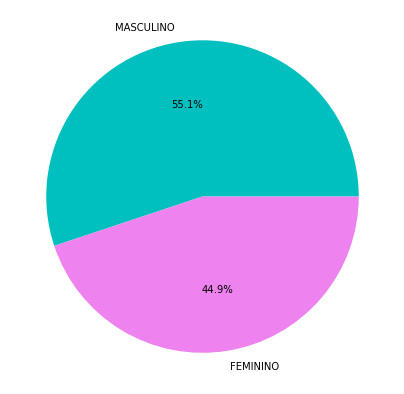

In [105]:
plt.figure(figsize=(7,7))

plt.axis('equal')
plt.pie(gf_pizza_sexos, 
        labels= ['MASCULINO','FEMININO'],
        autopct='%1.1f%%',
        colors= ["c","violet"]
)

plt.show()


In [ ]:
sexos_masc_fem_df.head()

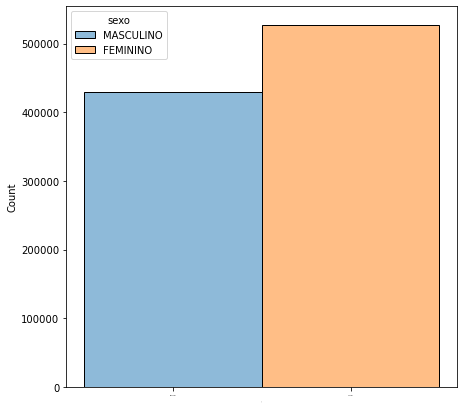

In [104]:
plt.figure(figsize=(7,7))
sns.histplot(data=sexos_masc_fem_df, x='sexo', hue='sexo')
plt.tick_params(axis='x', labelsize=0)
plt.xlabel([], fontsize=0)
plt.show()


# ANÁLISE 02 - Quantidade de casos por estado.

In [93]:
sexos_masc_fem_df.columns

Index(['codigo_paciente', 'local_atendimento', 'sexo', 'idade', 'cor',
       'nacionalidade', 'estado_nascimento', 'estado', 'data', 'data_obito'],
      dtype='object')

In [108]:
gf_pizza_estados = dados2['estado'].value_counts()
gf_pizza_estados

SÃO PAULO              430767
MINAS GERAIS           102853
MATO GROSSO             53060
CEARÁ                   48026
DISTRITO FEDERAL        47590
PARÁ                    42463
PARANÁ                  41153
PERNAMBUCO              33626
RIO GRANDE DO SUL       28495
AMAZONAS                20605
SERGIPE                 15938
SANTA CATARINA          15851
ESPIRITO SANTO          14056
PARAÍBA                 12941
ALAGOAS                  9688
MATO GROSSO DO SUL       9655
RIO GRANDE DO NORTE      9120
RONDONIA                 7142
ACRE                     6031
RORAIMA                  2716
RIO DE JANEIRO           2264
TOCANTINS                2179
PIAUÍ                    1512
BAHIA                     192
Name: estado, dtype: int64

In [121]:
dados2.estado.unique()

array(['SÃO PAULO', 'ACRE', 'ALAGOAS', 'RIO DE JANEIRO', 'SERGIPE',
       'PARÁ', 'MINAS GERAIS', nan, 'MATO GROSSO DO SUL', 'MATO GROSSO ',
       'PARANÁ', 'DISTRITO FEDERAL', 'ESPIRITO SANTO', 'SANTA CATARINA',
       'CEARÁ', 'PARAÍBA', 'AMAZONAS', 'RIO GRANDE DO NORTE', 'TOCANTINS',
       'RIO GRANDE DO SUL', 'PERNAMBUCO', 'RORAIMA', 'BAHIA', 'PIAUÍ',
       'RONDONIA'], dtype=object)

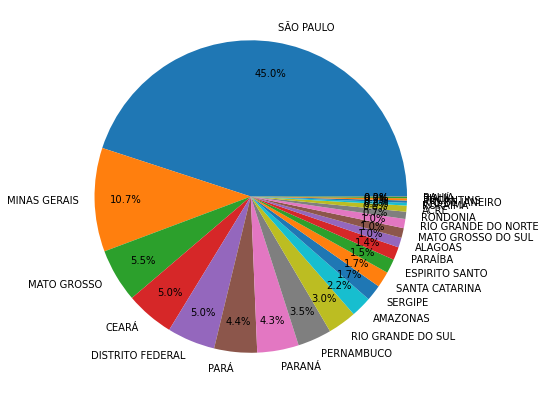

In [145]:
plt.figure(figsize=(7,7))

plt.axis('equal')
plt.pie(gf_pizza_estados,
        labels=['SÃO PAULO',
                'MINAS GERAIS',
                'MATO GROSSO',
                'CEARÁ',
                'DISTRITO FEDERAL',
                'PARÁ',
                'PARANÁ',
                'PERNAMBUCO',
                'RIO GRANDE DO SUL',
                'AMAZONAS',
                'SERGIPE',
                'SANTA CATARINA',
                'ESPIRITO SANTO',
                'PARAÍBA',
                'ALAGOAS',
                'MATO GROSSO DO SUL',
                'RIO GRANDE DO NORTE',
                'RONDONIA',
                'ACRE',
                'RORAIMA',
                'RIO DE JANEIRO',
                'TOCANTINS',
                'PIAUÍ',
                'BAHIA'],
        autopct='%1.1f%%',
        pctdistance= 0.8
)

plt.show()

In [150]:
gf_barras_sexos_df = pd.DataFrame(gf_pizza_estados)

In [151]:
gf_barras_sexos_df.head()

,estado
SÃO PAULO,430767
MINAS GERAIS,102853
MATO GROSSO,53060
CEARÁ,48026
DISTRITO FEDERAL,47590


No handles with labels found to put in legend.


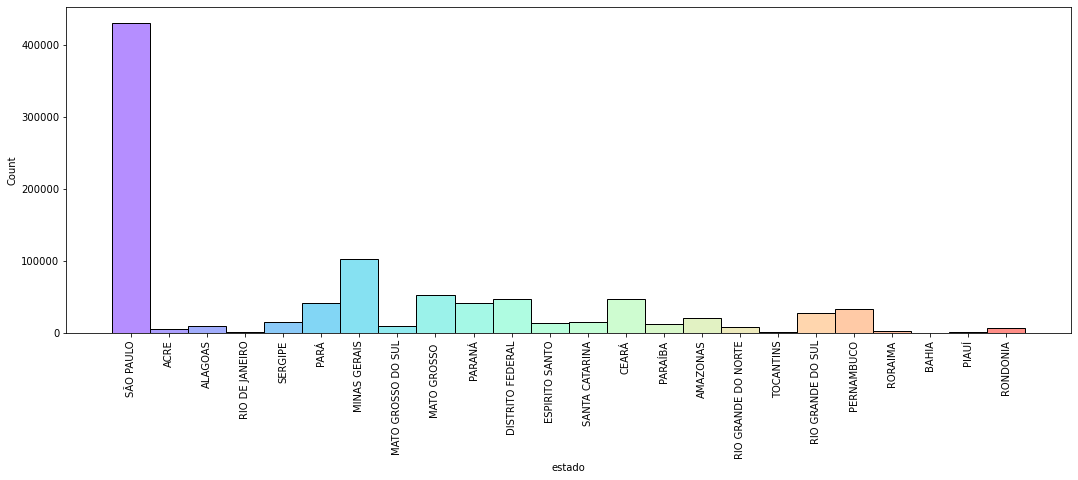

In [160]:
plt.figure(figsize=(18,6))
sns.histplot(data=dados2, x='estado', hue='estado', stat='percent', palette='rainbow')
plt.xticks(rotation = 90)
plt.legend().set_visible(False)

plt.show()

In [132]:
dados2.local_atendimento.unique()

array(['RCBP CAMPINAS-UNICAMP', 'RCBP SÃO PAULO', 'RCBP ACRE',
       'RCBP ALAGOAS', 'RCBP ANGRA DOS REIS', 'RCBP ARACAJU',
       'RCBP BELÉM', 'RCBP BELO HORIZONTE', 'RCBP CAMPINAS-SMS',
       'RCBP CAMPO GRANDE', 'RCBP CUIABA', 'RCBP CURITIBA',
       'RCBP MATO GROSSO (INTERIOR)', 'RCBP DISTRITO FEDERAL',
       'RCBP DRS BARRETOS', 'RCBP ESPÍRITO SANTO', 'RCBP FLORIANOPOLIS',
       'RCBP FORTALEZA', 'RCBP JAHU', 'RCBP JOAO PESSOA', 'RCBP MANAUS',
       'RCBP NATAL', 'RCBP PALMAS', 'RCBP POÇOS DE CALDAS',
       'RCBP PORTO ALEGRE', 'RCBP RECIFE', 'RCBP RORAIMA',
       'RCBP SALVADOR', 'RCBP SANTOS', 'RCBP TERESINA', 'RCBP GOIÂNIA',
       'RCBP RONDONIA'], dtype=object)

In [139]:

conditionlist=[
    (dados2['local_atendimento']=='RCBP CAMPINAS-UNICAMP'),
    (dados2['local_atendimento']=='RCBP SÃO PAULO'),
    (dados2['local_atendimento']=='RCBP ACRE'),
    (dados2['local_atendimento']=='RCBP ALAGOAS'),
    (dados2['local_atendimento']=='RCBP ANGRA DOS REIS'),
    (dados2['local_atendimento']=='RCBP ARACAJU'),
    (dados2['local_atendimento']=='RCBP BELÉM'),
    (dados2['local_atendimento']=='RCBP BELO HORIZONTE'),
    (dados2['local_atendimento']=='RCBP CAMPINAS-SMS'),
    (dados2['local_atendimento']=='RCBP CAMPO GRANDE'),
    (dados2['local_atendimento']=='RCBP CUIABA'),
    (dados2['local_atendimento']=='RCBP CURITIBA'),
    (dados2['local_atendimento']=='RCBP MATO GROSSO (INTERIOR)'),
    (dados2['local_atendimento']=='RCBP DISTRITO FEDERAL)'),
    (dados2['local_atendimento']=='RCBP DRS BARRETOS'),
    (dados2['local_atendimento']=='RCBP ESPÍRITO SANTO'),
    (dados2['local_atendimento']=='RCBP FLORIANOPOLIS'),
    (dados2['local_atendimento']=='RCBP FORTALEZA'),
    (dados2['local_atendimento']=='RCBP JAHU'),
    (dados2['local_atendimento']=='RCBP JOAO PESSOA'),
    (dados2['local_atendimento']=='RCBP MANAUS'),
    (dados2['local_atendimento']=='RCBP NATAL'),
    (dados2['local_atendimento']=='RCBP PALMAS'),
    (dados2['local_atendimento']=='RCBP POÇOS DE CALDAS'),
    (dados2['local_atendimento']=='RCBP PORTO ALEGRE'),
    (dados2['local_atendimento']=='RCBP RECIFE'),
    (dados2['local_atendimento']=='RCBP RORAIMA'),
    (dados2['local_atendimento']=='RCBP SALVADOR'),
    (dados2['local_atendimento']=='RCBP SANTOS'),
    (dados2['local_atendimento']=='RCBP TERESINA'),
    (dados2['local_atendimento']=='RCBP GOIÂNIA'),
    (dados2['local_atendimento']=='RCBP RONDONIA'),
]

choicelist = [
    'SÃO PAULO',
    'SÃO PAULO', 
    'ACRE',
    'ALAGOAS',
    'RIO DE JANEIRO',
    'SERGIPE',
    'PARÁ',
    'MINAS GERAIS',
    'SÃO PAULO',
    'MATO GROSSO DO SUL', 
    'MATO GROSSO',
    'PARANÁ',
    'MATO GROSSO',
    'DISTRITO FEDERAL',
    'SÃO PAULO',
    'ESPÍRITO SANTO', 
    'SANTA CATARINA',
    'CEARÁ', 
    'SÃO PAULO', 
    'PARAÍBA',
    'AMAZONAS',
    'RIO GRANDE DO NORTE', 
    'TOCANTINS', 
    'MINAS GERAIS',
    'RIO GRANDE DO SUL', 
    'PERNAMBUCO', 
    'RORAIMA',
    'BAHIA',
    'SÃO PAULO', 
    'PIAUÍ', 
    'GOIÁS',
    'RONDONIA'
]

In [140]:
dados2['estado_atendimento']= np.select(conditionlist, choicelist, default='Not Specified')

In [143]:
dados2.head()

,codigo_paciente,local_atendimento,sexo,idade,cor,nacionalidade,estado_nascimento,estado,data,data_obito,estado_atendimento
0,672054,RCBP CAMPINAS-UNICAMP,MASCULINO,30.0,BRANCO,BRASIL,SÃO PAULO,SÃO PAULO,07/10/2005,07/10/2005,SÃO PAULO
1,673745,RCBP CAMPINAS-UNICAMP,MASCULINO,71.0,BRANCO,BRASIL,SÃO PAULO,SÃO PAULO,21/10/2005,21/10/2005,SÃO PAULO
2,676350,RCBP CAMPINAS-UNICAMP,MASCULINO,71.0,BRANCO,BRASIL,SÃO PAULO,SÃO PAULO,06/11/2005,06/11/2005,SÃO PAULO
3,679877,RCBP CAMPINAS-UNICAMP,FEMININO,57.0,PARDA,BRASIL,ALAGOAS,SÃO PAULO,15/05/2005,15/05/2005,SÃO PAULO
4,676553,RCBP CAMPINAS-UNICAMP,MASCULINO,52.0,BRANCO,BRASIL,SÃO PAULO,SÃO PAULO,24/02/2005,24/02/2005,SÃO PAULO
